<a href="https://colab.research.google.com/github/coreyn120/CSCI167/blob/main/167_Project_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Dataset Exploration

**167 Project - Pima Indians Diabetes using Multi-layer Perceptron (MLP)**

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

The dataset used is the Pima Indians Diabetes Database using MLP to determine the onset of diabetes with binary classification (onset = 1, no onset = 0). The model wants to use this data to predict the onset of diabetes based on the information described below.

This is determined based on diagnostic measurements included in the dataset. All patients here are females at least 21 years old of Pima heritage.

The dataset includes the following columns for each patient (768 total):

Pregnancies: # of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years). Over half the patients are 33 years old or under

Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

---------------------------------

All of the data is either integers or floats. The only data preprocessing step was to skip over the first row when reading the data because it only included the labels for the categories above.

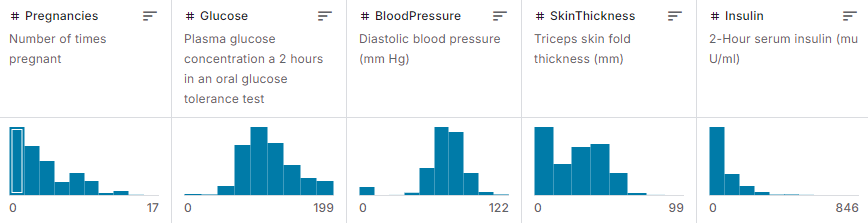

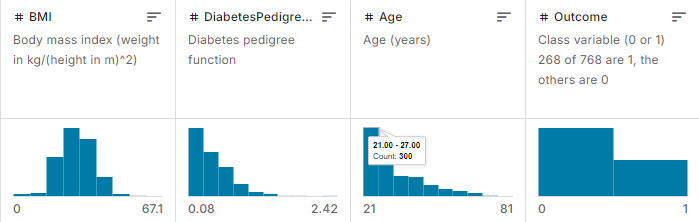

In [ ]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, f1_score
import os
import matplotlib.pyplot as plt # for graphs
import numpy as np
import seaborn as sns # for seaborn heatmap

In [ ]:
!pip install kaggle==1.5.12
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73026 sha256=830380c9e473cde76424c47cd17872d9c5440aedc75cdacd2cf3ef141f93dd49
  Stored in directory: /root/.cache/pip/wheels/70/0c/e6/79103212a102e78b8453691b905f48000219574ba7137e7207
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.17
    Uninstalling kaggle-1.6.17:
      Successfully uninstalled kaggle-1.6.17
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

100%|██████████| 8.91k/8.91k [00:00<00:00, 3.81MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1


In [ ]:
# load the dataset
file_path = os.path.join(path, "diabetes.csv")
dataset = loadtxt(file_path, delimiter=',', skiprows=1) # skip header row
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

# 2. Model Creation

The deep learning framework chosen is the TensorFlow Keras model. Models in Keras are defined as a sequence of layers, whick works well with MLP. As stated before, MLP is suitable for binary classification as it moves through the layers with various activation functions to make a more accurate prediction.

The loss function used is the binary cross entropy as it is designed to be used for binary classification problems. This problem wants to determine the onset of diabetes for patients as true (1) or false(0).

The optimizer used is the efficient scohastic gradient descent algorithm "Adam". This is used because it automatically updates itself which makes it useful in a lot of different problems.

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


An epoch is a pass through all of the rows in a training dataset, in this case, the diabetes.csv

A batch is a sample in the data that is used by the model before the weights of the model are changed to try improving accuracy or performance.

Number of epochs and batch size are hyperparameters that will be experimented with to possibly improve the performance of the program.

In [ ]:
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5605 - loss: 4.3758
Epoch 2/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4748 - loss: 1.6480
Epoch 3/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5546 - loss: 1.0521
Epoch 4/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6284 - loss: 0.9674
Epoch 5/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5979 - loss: 0.9494
Epoch 6/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6347 - loss: 0.8015
Epoch 7/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6274 - loss: 0.7628
Epoch 8/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6201 - loss: 0.7660
Epoch 9/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6530 - loss: 0.7036
Epoch 10/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6345 - loss: 0.7262
Epoch 11/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6679 - loss: 0.6755
Epoch 12/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7334 - loss: 0.5401  
Accuracy: 75.91


In [ ]:
# make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)
# summarize the first 10 cases
for i in range(10):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 0 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] => 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] => 0 (expected 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] => 1 (expected 0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] => 1 (expected 1)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] => 0 (expected 1)


<ipython-input-8-1a8d11f6ddd8>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))


# 3. Hyperparameter Exploration

Number of epochs and batch size will be modified to observe the changes in performance of this model.

You can edit the epoch and batch size in the code below to notice changes in the model's accuracy and performance.

In [ ]:
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

# make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)
# summarize the first 10 cases
for i in range(10):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

Epoch 1/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7933 - loss: 0.4618
Epoch 2/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7365 - loss: 0.4973
Epoch 3/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8020 - loss: 0.4414
Epoch 4/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7887 - loss: 0.4230
Epoch 5/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8199 - loss: 0.3973
Epoch 6/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7881 - loss: 0.4321
Epoch 7/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7875 - loss: 0.4484
Epoch 8/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8220 - loss: 0.4222
Epoch 9/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7547 - loss: 0.4556
Epoch 10/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7819 - loss: 0.4648
Epoch 11/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8131 - loss: 0.4200
Epoch 12/300
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

<ipython-input-24-da2466eb901f>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))


Changing the number of epochs ended up slightly increasing the accuracy of the model, most likely due to variance. Increasing the number of epochs led to much slower performance while not increasing acccuracy of the model a significant amount. Decreasing epochs slightly will increase performance of this model while not sacrificing a large amount of accuracy.

In my experiments, 150 epochs had an accuracy of 75.9.

100 epochs had an accuracy of ~77.9

300 epochs had an accuracy of 79.30

Changing the batch size of this model did not have a large impact on the accuracy (~77.0), but increasing the batch size allowed for much faster performance of the model. It would be worthwhile to increase the batch size since it speeds up performance while not impacting accuracy too much.


# 4. Results Documentation

The following code will evaluate the model's performance using loss and accuracy. Graphs will be shown for various number of epochs and batch sizes.

Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8152 - loss: 0.4148
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7951 - loss: 0.4234
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8130 - loss: 0.3950
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8079 - loss: 0.3994
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7976 - loss: 0.4081
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7811 - loss: 0.4243
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8129 - loss: 0.4021
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8010 - loss: 0.4177
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7857 - loss: 0.4346
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7984 - loss: 0.4211
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7806 - loss: 0.4333
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8064 - lo

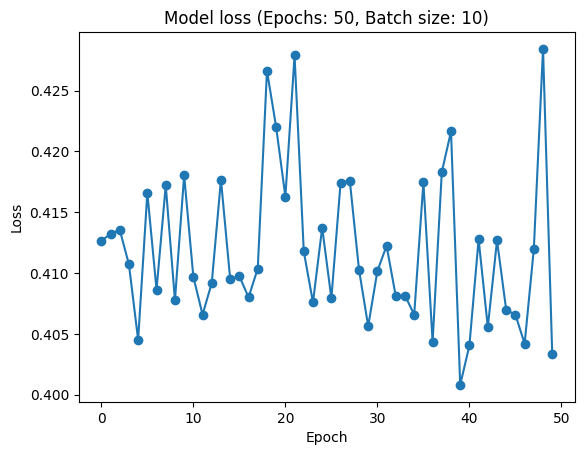

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7708 - loss: 0.4306 
Accuracy: 80.08


In [ ]:
# This code will create a graph to show the loss over the number of epochs
history = model.fit(X, y, epochs=50, batch_size=10) # training history will be stored in history variable

plt.plot(history.history['loss'], 'o-') # loss values stored in this variable
plt.title('Model loss (Epochs: 50, Batch size: 10)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

This code will show the loss over 100 epochs. (Batch size: 10)

Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7964 - loss: 0.4212
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7862 - loss: 0.4360
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7732 - loss: 0.4384
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7708 - loss: 0.4504
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7750 - loss: 0.4363
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8122 - loss: 0.4125
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7910 - loss: 0.4188
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7909 - loss: 0.4219
Epoch 9/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7844 - loss: 0.4296
Epoch 10/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7740 - loss: 0.4209
Epoch 11/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7939 - loss: 0.4179
Epoch 12/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

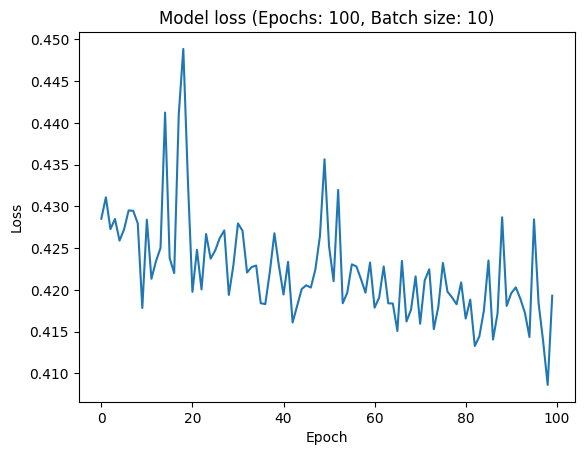

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7756 - loss: 0.4625  
Accuracy: 80.08


In [ ]:
history = model.fit(X, y, epochs=100, batch_size=10) # training history will be stored in history variable

plt.plot(history.history['loss']) # loss values stored in this variable
plt.title('Model loss (Epochs: 100, Batch size: 10)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

The following code will show the loss depending on different batch sizes.

Epoch 1/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8031 - loss: 0.4416
Epoch 2/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7977 - loss: 0.4240
Epoch 3/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7945 - loss: 0.4283
Epoch 4/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8108 - loss: 0.3942
Epoch 5/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7932 - loss: 0.4484
Epoch 6/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7693 - loss: 0.4457
Epoch 7/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7916 - loss: 0.4471
Epoch 8/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7940 - loss: 0.4292
Epoch 9/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7926 - loss: 0.4119
Epoch 10/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8043 - loss: 0.3897
Epoch 11/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7861 - loss: 0.4195
Epoch 12/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

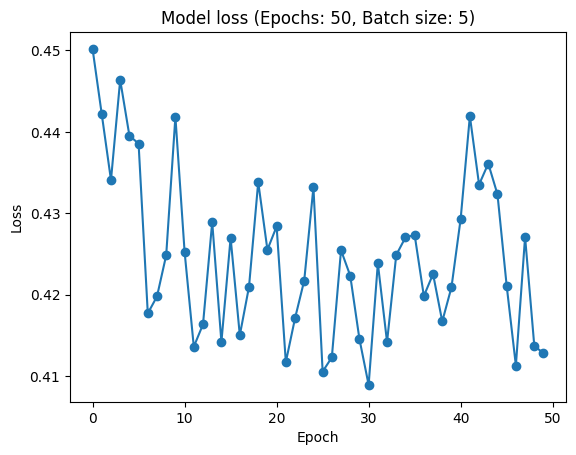

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7745 - loss: 0.4386 
Accuracy: 79.69


In [ ]:
# This code will create a graph to show the loss over the number of epochs
history = model.fit(X, y, epochs=50, batch_size=5) # training history will be stored in history variable

plt.plot(history.history['loss'], 'o-') # loss values stored in this variable
plt.title('Model loss (Epochs: 50, Batch size: 5)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8050 - loss: 0.3714
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7808 - loss: 0.3966
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8014 - loss: 0.3794
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8146 - loss: 0.3957
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7939 - loss: 0.4106
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8118 - loss: 0.3755 
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8150 - loss: 0.3774
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7824 - loss: 0.4155
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8044 - loss: 0.3869 
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8139 - loss: 0.3915
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7997 - loss: 0.3860
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7928 - 

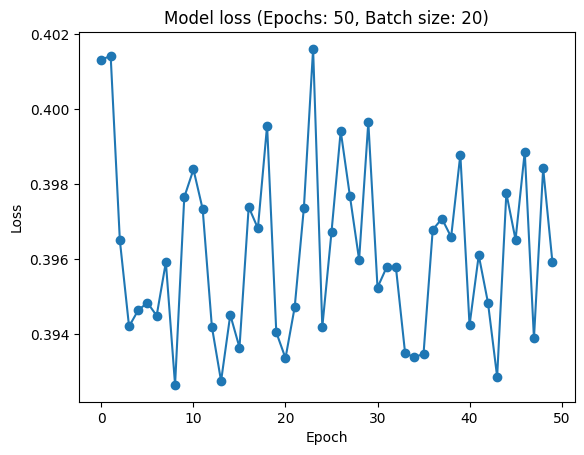

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7835 - loss: 0.4242 
Accuracy: 80.08


In [ ]:
# This code will create a graph to show the loss over the number of epochs
history = model.fit(X, y, epochs=50, batch_size=20) # training history will be stored in history variable

plt.plot(history.history['loss'], 'o-') # loss values stored in this variable
plt.title('Model loss (Epochs: 50, Batch size: 20)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

The following code will determine the F1 score of the model and show confusion matrices.

In [ ]:
y_pred = model.predict(X)
# Convert y_pred to binary predictions using a threshold (e.g., 0.5)
y_pred_binary = np.where(y_pred > 0.5, 1, 0) # If predicted probability >0.5 then 1, else 0

# Now calculate F1 score with binary predictions
f1 = f1_score(y, y_pred_binary)
print("F1 score: ", f1)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
F1 score:  0.6871165644171779


Let's now create a confusion matrix using this F1 score.

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


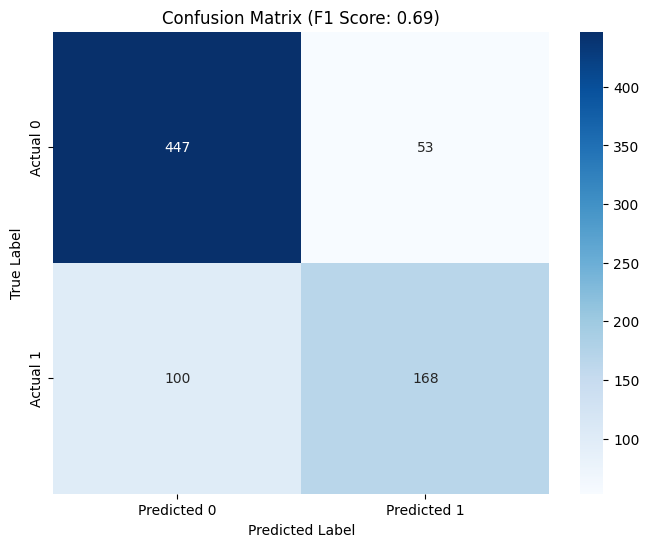

In [ ]:
# Get predictions and convert to binary
y_pred = model.predict(X)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

# Calculate F1 score
f1 = f1_score(y, y_pred_binary)

# Create confusion matrix
cm = confusion_matrix(y, y_pred_binary)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title(f"Confusion Matrix (F1 Score: {f1:.2f})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

This confusion matrix shows that the model correctly predicted 447 negative cases, 100 false negatives, 53 false positives, and 168 actual positive cases of the onset of diabetes in the Pima Indian demographic.

From this project, the model was able to correctly predict the onset of diabetes on a woman in the Pima Indian demographic about 70% of the time. This was done by using the dataset given to determine the chances based on the variables in the data.

The model would read the variables of Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, and Outcome. The model took the outcome from these variables and used MLP to develop some sort of logic to predict the onset of diabetes as true or false (binary classification).

Strengths of this model is that it works well with needs like binary classification using various integer and float values as input. Multilayer Perceptron, as stated previously, moves through the layers with different activation functions to help make a more accurate prediction. Other datasets can be used with this model to make binary classification predictions, with changes to the number of inputs and data preprocessing to turn data into number values.

Limitations of this model are that it could not get hyper accurate predictions. It would usually end up around 75-80% accuracy. A way to improve this could be to add more layers to the MLP or trying different optimizers. With more hidden layers, the model would have more training to make more accurate predictions.

Real-world scenarios where this model can be used include places like hospitals which could use a patient's data and have the model predict whether they have a condition or disease depending on previous data that the model has been fed for that specific condition.